In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,chi2_contingency, mode

In [3]:
df = pd.read_csv('../loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Q1. Graduate unmarried men

We believe that the [loan.csv](../loan.csv) data shows that graduate unmarried men are in a different income group than both married and unmarried graduate women.

To prove this, would a t-test be more appropriate or a chi-square test?

Carry out the test on the 'ApplicantIncome' column for the two groups and report the p-value. Also report your interpretation.

Note: Assume a confidence level of 95% and round off the p-value to 2 decimal places.

# Correct option: 
t-test with p=0.08, implying that the incomes are similar

# Explanation:

We will perform a t-test since the incomes are a continuous variable.

Nulll hypothesis (H0) : The incomes of both groups are similar.
Alternate hypothesis (Ha) : The incomes of both groups are different.


In [4]:
unmarried_men = df[(df["Married"] == "No") & (df["Gender"] == "Male") & (df["Education"] == "Graduate")]["ApplicantIncome"] 
unmarried_men.head()

0     5849
4     6000
13    1853
15    4950
31    3167
Name: ApplicantIncome, dtype: int64

In [8]:
women = df[(df["Gender"] == "Female") & (df["Education"] == "Graduate")]["ApplicantIncome"] 
women.head()

17    3510
29    3750
37    3667
45    3410
48    2645
Name: ApplicantIncome, dtype: int64

In [12]:
t_stats, p_value = ttest_ind(unmarried_men, women)
print("t_stats: ", t_stats)
print("p_value: ", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis, graduate unmarried men are in a SAME income group than both married and unmarried graduate women.")
else:
    print("Fail to reject the null hypothesis, graduate unmarried men are in a different income group than both married and unmarried graduate women.")

t_stats:  1.75360894634636
p_value:  0.0811185605889597
Fail to reject the null hypothesis, graduate unmarried men are in a different income group than both married and unmarried graduate women.


# Q2. Create new feature

We have been given a dataset containing the details of the people applied for loan.

dataset: [loan.csv](../loan.csv)

We wish to create a new feature called 'NewFeature' using a linear combination of the features ApplicantIncome, LoanAmount and Credit_History, with weights 1, 3 and 7000,

i.e., 
```javascript
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"]).
```

Since 'NewFeature' is a numerical feature, convert it to a categorical feature by checking whether 'NewFeature' is greater than 0.25 times the mean of 'NewFeature'. Call this feature 'Separator'.

Perform a chi-square test on the contingency table formed by the features 'Loan_Status' and 'Separator' and report the p-value. Also report your interpretation.

Note: Drop all the rows having 'na' values before performing any operation on the data and assume the significance level to be 5%. Also, round off the p-value to four decimal places.

# Correct option: 
p-value 0.0001, the two features Separator and Loan_Status are dependent.

# Explanation:
Based on the given question, we define our hypothesis as:

H0: The features Separator and Loan_Status are independent.
Ha: The features Separator and Loan_Status are dependent on each other.
We can perform Chi squared test on this data using the following code:

In [26]:
data = df
data.head()
data.dropna(inplace=True)

In [39]:
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NewFeature,Separator
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,11967.0,True
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,10198.0,True


In [28]:
newFeatureMean = data['NewFeature'].mean()
data['NewFeature'] = data['NewFeature'].apply(lambda x: 1 if x > 0.25*newFeatureMean else 0)

data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NewFeature
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1


In [29]:
pd.crosstab(data["NewFeature"],data["Loan_Status"])

Loan_Status,N,Y
NewFeature,,
0,11,2
1,137,330


In [30]:
val = pd.crosstab(index = data["NewFeature"], columns = data["Loan_Status"]).values
print(val)

[[ 11   2]
 [137 330]]


In [37]:
#H0: Loan status and NewFeature are independent - un-correlated
#Ha: Dependent.

# p-value calculation
p_value = chi2_contingency(val)[1]
print('p-value:',round(p_value,4))

if(p_value < 0.05):
  print("Since p-value < 0.05, the two features 'Separator' and 'Loan_Status' are dependent.")
else:
  print("Since p-value > 0.05, the two features 'Separator' and 'Loan_Status' are independent.")

p-value: 0.0001
Since p-value < 0.05, the two features 'Separator' and 'Loan_Status' are dependent.


# Q3. Numerical to categorical

We have been given a dataset containing the details of the people applied for loan.

dataset: [loan.csv](../loan.csv)

Which of the following features can be converted from a numerical feature to a categorical feature simply by renaming the values?

In [43]:
# Since the Credit_History contains the values that are either 0.0 or 1.0, which can be relabeled as False and True, respectively.
#herefore,it can be converted from a numerical feature to a categorical feature simply by renaming the values.
df["Credit_History"].unique()

array([1., 0.])

# Q4. Skewness

The following list contains data about the age of visitors, in a mall.

data=[38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38]

Based on the given data, decide the distribution of data.

<Axes: ylabel='Count'>

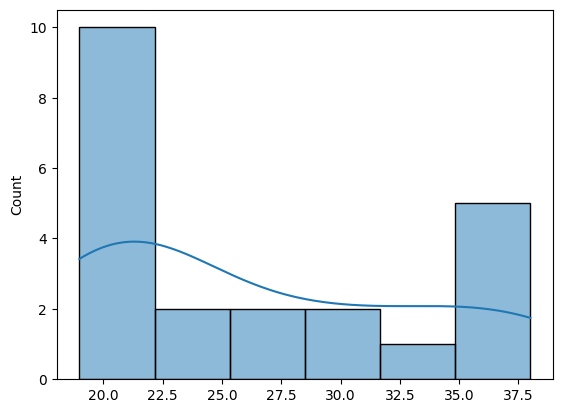

In [44]:
data=[38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38]
sns.histplot(data=data,kde=True)

In [50]:
# For a negatively skewed distribution, mean<median<mode
# For distribution with no skewness(Normal), mean=median=mode
# For a positively skewed distribution, mean>median>mode

data = np.array(data)
print("Mean: ", np.mean(data))
print("Median: ", np.median(data))
print("Mode: ", np.argmax(np.bincount(data)))
print(mode(data))

Mean:  26.545454545454547
Median:  24.5
Mode:  21
ModeResult(mode=21, count=5)


# Q5. What's the distribution called?

Data distributions can be named based on the kurtosis value. Specifically, for given kurtosis k :

- If k = 3, it is called a Mesokurtic distribution and has kurtosis statistics similar to a normal distribution.

- For k > 3, it is called a Leptokurtic distribution (has a profound number of outliers)

- And for k < 3, it is called a Platykurtic distribution (shows lack of outliers).

Based on this information, given a data sample [4, 6, 2, 18, 7, 2], what would be this kind of distribution called?

<Axes: ylabel='Count'>

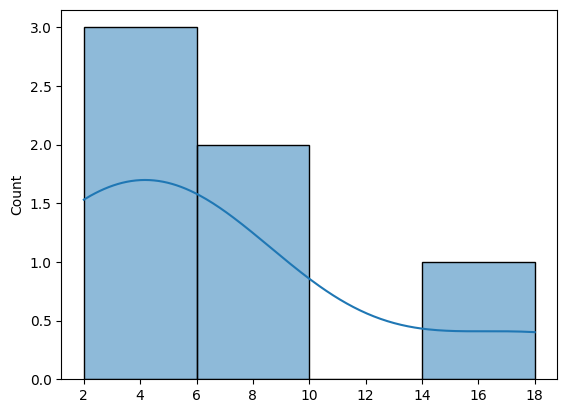

In [56]:
data = pd.Series([4, 6, 2, 18, 7, 2])
sns.histplot(data, kde=True)

This plot is not enough to help us determine which distribution is followed, as the data size is very small.

We can however, utilise the pd.kurt() function, to get a value of kurtosis in this data.

In [57]:
data = pd.Series([4, 6, 2, 18, 7, 2])
data.kurt()

3.7162188375322973

# Q6. True Statements

Which of the following statements are true?
- Kurtosis helps us to measure the peakedness of the given distribution of the data.

- Kurtosis tells us if there are any outliers present in the data.

- The Q-Q plot between a log-normal distribution and a normal distribution should be a straight line with a slope approximately equal to 1.

- If a spearman rank correlation between two distributions is close to 1 then they are sure to have a linear relation between them.


## Correct option : 
Kurtosis tells us if there are any outliers present in the data.

## Explanation :

- Kurtosis gives us the measure of tailedness and outliers in the distribution of the data. It does not give us the measure of the peak.
- The Q-Q plot between the log-normal distribution and normal distribution won’t be a straight line. For getting a straight line we will first have to take the log of each value in the log-normal distribution and then the Q-Q plot of these logarithmically transformed values from the log-normal distribution and normal distribution will be a straight line.
- For a data distribution like the one in the picture shown below also we can get a good Spearman correlation score but with that, we cannot assume that the relationship between the data is linear.

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/109/original/linear.PNG?1649061719)

# Q7. Female applicant

In the [loan.csv](../loan.csv) dataset, we wish to test the hypothesis that among all loan applicants who were rejected for a loan, applicants with a credit history of 1 are more likely to be female.

Use a chi-square test to verify this claim (Ensure that you drop all nan rows), and report your interpretation.

Note: Use a significance level of 5%.

In [6]:
df_female = df[df["Gender"] == "Female"].copy()
df_female.dropna(inplace=True)
df_female.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y


In [7]:
pd.crosstab(df_female["Gender"], df_female["Credit_History"])

Credit_History,0.0,1.0
Gender,,
Female,14,72


In [8]:
val = pd.crosstab(index = df_female["Gender"], columns=df_female["Credit_History"]).values
print(val)

[[14 72]]


In [11]:

#Null hypothesis (H0): the features are independent.
#Alternate hypothesis (Ha) : the features are dependent.

#The below given code performs the chi2 test and the p-value comes out to be 0.961.

# data of all the rejected applicants
chn = df[(df["Loan_Status"] == "N")]

#dropping na values
chn = chn.dropna()

#contingency table
contingency = pd.crosstab(chn['Gender'], chn['Credit_History'])
print(contingency)

#p-value
print('p-value:', round(chi2_contingency(contingency)[1],3))

if p_value > 0.05:
 print('Since p_value > 0.05, we fail to reject the null hypothesis.')
else:
 print('Since p_value < 0.05, we reject the null hypothesis.')


Credit_History  0.0  1.0
Gender                  
Female           13   19
Male             50   66
p-value: 0.961
Since p_value > 0.05, we fail to reject the null hypothesis.


# Q8. Univariate Analysis

Which type of graphical techniques can be applied to analyze Continuous and Categorical features?
- Box plot for continuous variable

- Pie chart for continuous variable

- Bar plot for categorical variable

- Histogram for continuous variable
 
- Q-Q plot specifically for outliers in Continuous variable

## Correct Answers:

- Box plot for continuous variable.
- Bar plot for categorical variable.
- Histogram for continuous variable.
- Q-Q plot specifically for outliers in Continuous variable.

## Explanation:

- Continuous variables can be analyzed using Histogram, KDE, and Boxplot.
- Categorical Variable can be analyzed using Bar Plot, Pie Chart, and Frequency Table
- A Q-Q plot is used for testing whether a dataset follows a distribution, but it is also used to determine outliers.